Run the code cell below with the ▶| button above to set up this notebook, or type `SHIFT-ENTER`:

In [1]:
from datascience import *
import pandas as pd
import geojson
import numpy as np
import matplotlib.pyplot as plt
import folium
from IPython.display import HTML, display, IFrame
from folium import plugins
%matplotlib inline
from scipy import stats
import ipywidgets as widgets
from soc_module import *
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import re

# Sociology 130 Module: "The Neighborhood Project"

Welcome to the data science part of your project! You have gathered data and entered it [here](https://goo.gl/forms/eY1mephilS6VqAT83) from your assigned census tracts.  Now it's time to explore our class data and quantify our observations using Python, a popular programming language used in data science. 

You won't need any prior programming knowledge to do this! The purpose of this module is not to teach you programming, but rather to show you the power of these tools and give you the intuition for how they work. It also allows us to quickly produce summarizations of our data!

## Table of Contents

0. [Python and Jupyter Notebooks](#jupyter)
1. [Class Data](#yourdata)
2. [Our Metrics](#ourmetrics)
3. [Census Data](#census)
4. [Correlation](#correlation)
5. [Regression](#regression)

#### Completing the Notebooks


<div class="alert alert-info"> 

**QUESTION** cells are in blue and ask you to answers questions or fill in code cells. To receive full credit for your assignment, you must complete all **QUESTION** cells.


</div>



# Part 0: Introduction to Python and Jupyter Notebooks: <a id='jupyter'></a>

## 1. Cells and Code
In a notebook, each rectangle containing text or code is called a *cell*.

Cells (like this one) can be edited by double-clicking on them. This cell is a text cell, written in a simple format called [Markdown](http://daringfireball.net/projects/markdown/syntax) to add formatting and section headings.  You don't need to worry about Markdown today, but it's a pretty fun+easy tool to learn.

After you edit a cell, click the "run cell" button at the top that looks like ▶| to confirm any changes. (Try not to delete the instructions.) You can also press `SHIFT-ENTER` to run any cell or progress from one cell to the next.

Other cells contain code in the Python programming language.  Running a code cell will execute all of the code it contains.

Try running this cell:

In [2]:
print("Hello, World!")

Hello, World!


When you need to run an entire Jupyter notebook, click on the "Cell" option at the top and then select "Run All". This should execute each cell of the notebook.

In [3]:
# <-- Hash symbol marks a "comment" in Python that would not be executed or printed out. 
# Comments are often used to explain the actual code. 

### Technical Issues
If you run a cell and see a `NameError` message below the cell, you probably forgot to run one of the cells above it. Make sure you run all the cells in order each time you open the notebook. You can do this easily by going to the "Cell" menu at the top and clicking "Run all".

If at the top right side of the notebook you get a flag "Cannot Connect to Kernel", this may have happened due to poor internet connectivity. Try clicking "Kernel" at the top left and selecting either "Restart" or "Restart & Run All".

Still having issues? **Come to Data Peer Consulting Office Hours at 3rd Floor Moffitt!** Find a Peer Consultant with the expertise you need and get your questions answered: [Office Hours Schedule is linked here]( https://data.berkeley.edu/education/peer-consulting)

### Save and Access the Notebook
To save your progress in your Jupyter notebook, click on the floppy disk icon at the top left corner or go to the File menu and select "Save and Checkpoint". If you want to come back to this notebook later, use the link provided by your professor or go to https://datahub.berkeley.edu and sign in with your bCourses account.

## 2. Basic Python Functionality

[Optional] Click on the [link](http://datahub.berkeley.edu/user-redirect/interact?account=ds-modules&repo=SOC-130AC&branch=master&path=Part-0-Intro-to-Python.ipynb) which will take you to another Jupyter notebook where you can further explore Python. 

# Part 1: Class Data<a id='yourdata'></a>

We can read in the data you submitted through the form by asking Google for the form information and turning it into a table.

In [4]:
# The following two lines read two spreadsheets.
image_data = Table.read_table("data/image_data.csv")
class_data = Table.read_table("data/class_data.csv")

# The following block cleans entries in the "Census Tract" column.
image_data["Census Tract"] = [str(i) for i in image_data["Census Tract"]]
class_data["Census Tract"] = [str(i) for i in class_data["Census Tract"]]
sub = lambda s: re.sub(r"\.[0-9]*", "", s) # Defines a function that removes decimals.

# Applies the function defined above to the "Census Tract" column in both tables.
image_data["Census Tract"] = image_data.apply(sub, "Census Tract")
class_data["Census Tract"] = class_data.apply(sub, "Census Tract")

image_data.show(5)
class_data.show(5)

Image #1,Image #1 Address,Other thoughts or comments for Image #1,Image #2,Image #2 Address,Other thoughts or comments for Image #2,Image #3,Image #3 Address,Other thoughts or comments for Image #3,Image #4,Other thoughts or comments for Image #4,Image #4 Address,Image #5,Image #5 Address,Other thoughts or comments for Image #5,Image #1 coordinates,Image #2 coordinates,Image #3 coordinates,Image #4 coordinates,Image #5 coordinates,Census Tract
https://drive.google.com/open?id=1RmWTmeeYjbIgKaFhrgQE1M ...,"601 Webster St, Oakland, CA, 94609",This was one of a few stores that were gated up during t ...,https://drive.google.com/open?id=1PXD3bu_7j2vVDhS7I6HRBa ...,"601 Webster Street, Oakland, CA, 94609",The Salvation Army was closed on this particular day but ...,https://drive.google.com/open?id=1KY1Mvgc9-eLqvG6KkNwsgc ...,"601 Webster Street, Oakland, CA, 94609","I should have gone in here to try the food, it smelled ...",https://drive.google.com/open?id=1keCgzxOTujwnZ9EQB4skHb ...,UGS crew --- possibly a gang or street dance team? There ...,"601 Webster St, Oakland, CA, 94609",nan,nan,nan,"[37.798025, -122.272283]","[37.798025, -122.272283]","[37.798025, -122.272283]","[37.798025, -122.272283]",nan,4030
https://drive.google.com/open?id=1stJ2WAm5XvqD1TfKRLmGG_ ...,"931 Carmel Ave, Albany, CA, 94706",nan,https://drive.google.com/open?id=1UlT_fZkGjDLHoV9onuUMU0 ...,"1362 Marin Ave, Albany, CA , 94706",nan,https://drive.google.com/open?id=1-eg5yVHgMiRtJCpbgZQl8f ...,"1391 Solano Ave, Albany, CA, 94706",nan,https://drive.google.com/open?id=1mouPFYSJ16OWxgNGtnsb6C ...,nan,"1391 Solano Ave, Albany, CA, 94706",https://drive.google.com/open?id=1ymFvN6smtsGKB96TLb-1HX ...,"708 Solano Ave, Albany, CA, 94706",nan,"[37.8899946030529, -122.289521691888]","[37.8883455055134, -122.288877697661]","[37.8908002222222, -122.290461888889]","[37.8908002222222, -122.290461888889]","[37.888633027305, -122.307014522052]",4205
https://drive.google.com/open?id=1kpIEXVR335w3vtrZj0Qxz6 ...,"2200 Los Angeles St, Berkeley, CA, 94704",The only house on Los Angeles Street with a single giant ...,https://drive.google.com/open?id=1zRsqDdsZBeYDSho_EuiZ6G ...,"2210 Los Angeles Street, Berkeley, CA, 94704",Another example of a well-maintained house on Los Angele ...,https://drive.google.com/open?id=12Fqi0YrnKfV9eqelGoyS__ ...,"1136 Spruce Street, Berkeley, CA, 94704",One of many houses that’s currently being renovated on w ...,https://drive.google.com/open?id=189j-3sZAefhs8gH35aEY1R ...,"PG&E is currently working on Spruce Street, with many “R ...","1128 Spruce Street, Berkeley, CA, 94704",https://drive.google.com/open?id=1Hn70fF7xfZh1IT7oxwUimO ...,"1133 Spruce Street, Berkeley, CA, 94704",This house is located at the east side of Spruce Street. ...,"(37.8883409, -122.270922)","(37.8883409, -122.270922)","[37.8876024042097, -122.266919689902]","[37.8877886656757, -122.266948315416]","[37.8879082848895, -122.26673971951]",4214
https://drive.google.com/open?id=15rdCtKIgX-Fb8WCHI4d8Ke ...,"378 8th Street, Oakland, CA, 94607",nan,https://drive.google.com/open?id=1hMNbBE8pc9Q82jcr4gK-qn ...,"360 8th Street, Oakland, CA, 94607",nan,https://drive.google.com/open?id=1ykCymHyvIELaRbnRcrAdp- ...,"376 8th Street, Oakland, CA, 94607",nan,https://drive.google.com/open?id=1rfVrj-7QZkbfUWazVV-P2e ...,nan,"800 Franklin Street, Oakland, CA, 94607",nan,nan,nan,"[37.7995886695836, -122.272012934734]","[37.7994604111548, -122.27167993785]","[37.8020326, -122.2784424]","[37.799789, -122.272409]",nan,4030
https://drive.google.com/open?id=1F1B-1oHlh9y6zz-yFxUGUz ...,"1645 Hopkins Street, Berkeley, CA, 94707","Unfortunately, this building was at the end of the walk- ...",https://drive.google.com/open?id=1ycZ91fitTHwhiVOyESVoJo ...,"1226 Carlotta Avenue, Berkeley, CA, 94707",For the stretch from the intersection of Carlotta Ave. a ...,https://drive.google.com/open?id=1S_BJ03A64lP9Q2pV34bY8z ...,"1647 Hopkins Street, Berkeley, CA, 94707",nan,https://drive.google.com/open?id=1a4rgJSw2qIMk130

Timestamp,Census Tract,Amount of Beer/Liquor Bottles (1 to 5 scale),Amount of Cigarette/Cigar Butts (1 to 5 scale),Amount of Condoms (1 to 5 scale),Amount of Garbage (1 to 5 scale),Abandoned Cars (Y?N),Treatment (1 (Friendly) to 5 (Suspicion) scale),Condition of Buildings (1 (Good) to 4 (Poor) scale),Graffiti (Y/N),Fenching (1 (None) to 4 (High mesh) scale),Renovations (Y/N),Types of Establishments,Amount of Trees Linked the Block Fence (1 (Few) to 3 (Most) scale),Public Transporation Available (Y/N),Private Security Visible (Y/N),Police Visible (Y/N)
2019-10-25 12:52:40,4030,1,2,1,2,0,4,4,1,3,1,"Bodega deli corner-store convenience store, Eating place ...",1,0,0,0
2019-10-25 12:54:25,4205,1,1,1,1,0,1,1,0,1,0,"Banks or credit unions, Community center, Eating places/ ...",3,1,0,0
2019-10-25 14:32:16,4214,1,1,1,1,0,2,2,0,2,1,Schools or daycare centers,3,1,0,0
2019-10-25 15:27:57,4030,1,2,1,3,0,3,2,1,1,0,"Banks or credit unions, Eating places/restaurants, Super ...",1,0,0,0
2019-10-25 21:24:53,4213,1,1,1,1,0,2,4,0,2,1,Professional offices (doctor dentist lawyer accountant r ...,3,1,0,0


That's a lot of columns! Now that our data is inside the `class_data` variable, we can ask that varible for some information. We can get a list of the column names with the `.labels` attribute of the table:

In [5]:
class_data.labels

('Timestamp',
 'Census Tract',
 'Amount of Beer/Liquor Bottles (1 to 5 scale)',
 'Amount of Cigarette/Cigar Butts (1 to 5 scale)',
 'Amount of Condoms (1 to 5 scale)',
 'Amount of Garbage (1 to 5 scale)',
 'Abandoned Cars (Y?N)',
 'Treatment (1 (Friendly) to 5 (Suspicion) scale)',
 'Condition of Buildings (1 (Good) to 4 (Poor) scale)',
 'Graffiti (Y/N)',
 'Fenching (1 (None) to 4 (High mesh) scale)',
 'Renovations (Y/N)',
 'Types of Establishments',
 'Amount of Trees Linked the Block Fence (1 (Few) to 3 (Most) scale)',
 'Public Transporation Available (Y/N)',
 'Private Security Visible (Y/N)',
 'Police Visible (Y/N)')

Let's get some summary statistics and do some plotting.

How many of you reported on which census tracts?

In [6]:
class_data.group("Census Tract").show()

Census Tract,count
4005,6
4006,6
4007,6
4010,6
4014,7
4027,6
4028,5
4030,6
4031,5
4033,6



We can use the `.plot.barh()` method to this to visualize the counts:

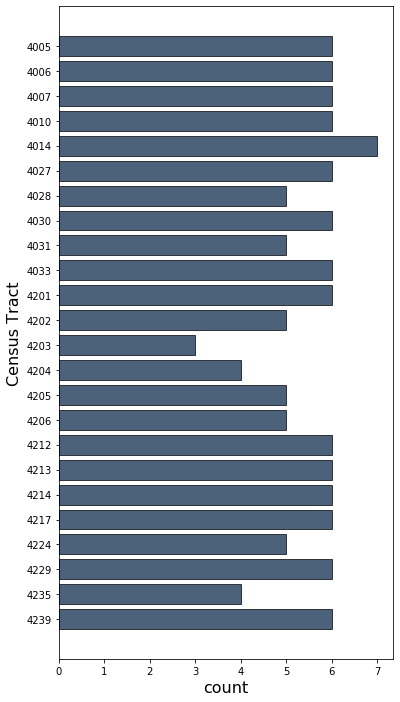

In [7]:
class_data.group("Census Tract").barh("Census Tract")

One of the key principles of coding is to recycle the code we have written and reduce repetition.

We can write a short function, `bar_chart_column`, to plot the counts for any of our columns in the table. All we have to do is select the column label in the dropdown.

In [8]:
# This function takes one argument: COL.
# It then draws a bar chart for this column.
def bar_chart_column(col):
    bar_chart_data.group(col).barh(col)

bar_chart_data = class_data.drop("What kinds of establishments are there on the block face? Select all that apply.")

# Interative widget. Feel free to choose any column
# in the dropdown menu.
dropdown = widgets.Dropdown(options=bar_chart_data.labels[1:], description="Column")
display(widgets.interactive(bar_chart_column, col=dropdown))

interactive(children=(Dropdown(description='Column', options=('Census Tract', 'Amount of Beer/Liquor Bottles (…

We can then ask for these columns and plot their means too.

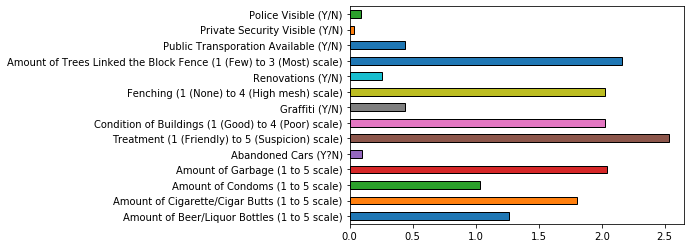

In [9]:
(class_data
    .to_df()
    .iloc[:,2:] # Keeps all the rows, but keeps only columns that have indices >= 2
    .mean()     # Takes the mean of each column
    .plot       # Draws a bar chart.
    .barh());

One of the questions had checkbox answers that listed all of the establishments that were observed by each student in their assigned census tract. Let's create a seperate column for each of the possible options. A value of `1` in the column indicates that the estalishment was observed. A value of `0` indicates that the establishment was not observed.

This is called **one-hot encoding**.

In [10]:
# Extracts responses about establishments.
raw_establishment_responses = class_data.to_df().iloc[:, 12]

# For each response, split it into a list of options selected.
split_establishment_responses = [response.split(", ") for response in raw_establishment_responses
                                 if not pd.isnull(response)]

# The variable above is a list of lists.
# We want to flatten the list.
establishments = pd.Series([item for sublist in split_establishment_responses for item in sublist])


# Now let's do one-hot encoding!
ests_table = Table.empty().with_column("Types of Establishments", class_data["Types of Establishments"])

for establishment in establishments.unique():
    establishment_data = []

    for row in class_data.rows:
        ests = row.item('Types of Establishments')
       
        if not pd.isnull(ests):
            row_establishments = ests.split(', ')
        
        if establishment in row_establishments:
            establishment_data.append(1)
        else: 
            establishment_data.append(0)
    
    ests_table[establishment] = establishment_data
    
ests_table.show(5)

Types of Establishments,Bodega deli corner-store convenience store,Eating places/restaurants,Fast food or take-out places,Banks or credit unions,Community center,Gas station,Post office,Supermarkets/grocery stores,Schools or daycare centers,Professional offices (doctor dentist lawyer accountant real estate),Parks,nan,Bars and alcoholic beverage services,Chain retail stores,Auto repair/auto body shop,Liquor stores or Marijuana Dispensaries,Warehouses,Playgrounds,Manufacturing,N/A,Payday lenders check cashers or pawn shops,Fire station,Police station
"Bodega deli corner-store convenience store, Eating place ...",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Banks or credit unions, Community center, Eating places/ ...",0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Schools or daycare centers,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Banks or credit unions, Eating places/restaurants, Super ...",0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Professional offices (doctor dentist lawyer accountant r ...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


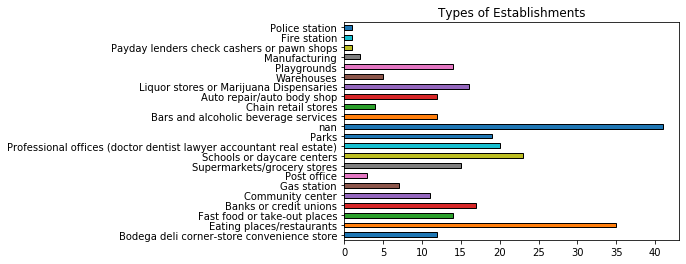

In [11]:
# Find the sum of each of the establishments.
col_sums = []
for col in ests_table.drop(0).labels:
    col_sums.append(sum(ests_table[col]))

# Put them into a series : index ~ type of establishment, value ~ count
establishment_counts = pd.Series(col_sums, index = ests_table.drop(0).labels)
establishment_counts = establishment_counts.drop("N/A")

establishment_counts.plot.barh()
plt.title(ests_table.labels[0])
plt.show()

---

## Mapping

We can also visualize how your responses mapped out over the census tracts. We'll use a library called `folium` to map your observations onto a map of the census tracts, and include popups with your comments and photos.

In [12]:
alameda = geojson.load(open("data/alameda-2010.geojson"))
myMap = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)

map_data(myMap, alameda, image_data).save("maps/map1.html") # remove null row
IFrame('maps/map1.html', width=700, height=400)

Click around census tracts near yours to see if the other students' observations are similar and see if you can eyeball any trends. Check out other areas on the map and see if there are trends for tracts in specific areas.

<div class="alert alert-info">

**QUESTION:** Do specific characteristics cluster in different areas? Which ones? Which characteristsics seem to cluster together? What types of data do you think will correlate with socioeconomic characteristics like median income, poverty rate, education?  Why?

</div>

_Type your answer here, replacing this text._

---

# Part 2: Our Metrics<a id='ourmetrics'></a>

Now that you have made some predictions, we can compare our data with socioeconomic data from the U.S. Census for the different tracts we visited and see if we can find evidence to support them. From your data, we can create some point scales that measure different aspects of a neighborhood.

For example, we can make a scale called “social disorder” for the first part of your responses. Let's first subeset our data:

In [13]:
#class data is not changed after selection
social_disorder = class_data.select(range(1, 12))
social_disorder.show(5)

Census Tract,Amount of Beer/Liquor Bottles (1 to 5 scale),Amount of Cigarette/Cigar Butts (1 to 5 scale),Amount of Condoms (1 to 5 scale),Amount of Garbage (1 to 5 scale),Abandoned Cars (Y?N),Treatment (1 (Friendly) to 5 (Suspicion) scale),Condition of Buildings (1 (Good) to 4 (Poor) scale),Graffiti (Y/N),Fenching (1 (None) to 4 (High mesh) scale),Renovations (Y/N)
4030,1,2,1,2,0,4,4,1,3,1
4205,1,1,1,1,0,1,1,0,1,0
4214,1,1,1,1,0,2,2,0,2,1
4030,1,2,1,3,0,3,2,1,1,0
4213,1,1,1,1,0,2,4,0,2,1


Now we'll need to scale the values because all responses were not on the same scale. But for this part, the higher the value the more negative the social disorder was:

In [14]:
social_disorder = scale_values(social_disorder, np.arange(1, 11))
social_disorder.show(5)

Census Tract,Amount of Beer/Liquor Bottles (1 to 5 scale),Amount of Cigarette/Cigar Butts (1 to 5 scale),Amount of Condoms (1 to 5 scale),Amount of Garbage (1 to 5 scale),Abandoned Cars (Y?N),Treatment (1 (Friendly) to 5 (Suspicion) scale),Condition of Buildings (1 (Good) to 4 (Poor) scale),Graffiti (Y/N),Fenching (1 (None) to 4 (High mesh) scale),Renovations (Y/N)
4030,0,0.25,0,0.25,0,0.75,1,1,0.666667,1
4205,0,0,0,0,0,0,0,0,0,0
4214,0,0,0,0,0,0.25,0.333333,0,0.333333,1
4030,0,0.25,0,0.5,0,0.5,0.333333,1,0,0
4213,0,0,0,0,0,0.25,1,0,0.333333,1


Now that our values are scaled, we can take the mean across all observation for a given census tract for a given column, and then take the mean across columns:

In [15]:
#extracting means across columns
means = social_disorder.group("Census Tract", np.mean).drop("Census Tract").values.mean(axis=1)

#assigning Census Tract to their respective means
social_disorder = Table().with_columns(
    "Census Tract", np.unique(social_disorder.column("Census Tract")),
    "Social Disorder", means
)
social_disorder

Census Tract,Social Disorder
4005,0.2875
4006,0.202778
4007,0.283333
4010,0.308333
4014,0.484524
4027,0.319444
4028,0.315
4030,0.343056
4031,0.298333
4033,0.302778


Remember, the higher the value the more negative we perceived the census tract to be.

We can do the same for our amenities part:

In [16]:
#adding 2 new columns to Establishments table to create a new table for amenities
#note: the columns are added at the end of the table
amenities = ests_table.with_columns(
    "Census Tract", class_data.column("Census Tract"),
    "Trees", class_data.column("Amount of Trees Linked the Block Fence (1 (Few) to 3 (Most) scale)")
)

#converting Trees values to binary: 0 if "1 (Few)" and 1 if more
amenities["Trees"] = [(0, 1)[value > 1] for value in amenities["Trees"]]
amenities.show(5)

Types of Establishments,Bodega deli corner-store convenience store,Eating places/restaurants,Fast food or take-out places,Banks or credit unions,Community center,Gas station,Post office,Supermarkets/grocery stores,Schools or daycare centers,Professional offices (doctor dentist lawyer accountant real estate),Parks,nan,Bars and alcoholic beverage services,Chain retail stores,Auto repair/auto body shop,Liquor stores or Marijuana Dispensaries,Warehouses,Playgrounds,Manufacturing,N/A,Payday lenders check cashers or pawn shops,Fire station,Police station,Census Tract,Trees
"Bodega deli corner-store convenience store, Eating place ...",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4030,0
"Banks or credit unions, Community center, Eating places/ ...",0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4205,1
Schools or daycare centers,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4214,1
"Banks or credit unions, Eating places/restaurants, Super ...",0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4030,0
Professional offices (doctor dentist lawyer accountant r ...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4213,1


Certain amenities are positive and indicate desirable conditions in a neighborhood. These characteristics include things like School or Daycares, and supermarkets. Let's create a table containing only positive amenities

In [17]:
#selecting all the necessary columns from amenities table to be included in positive_amenities
positive_amenities = amenities.select(
    'Census Tract',
    'Banks or credit unions',
    'Chain retail stores',
    'Community center',
    'Eating places/restaurants',
    'Fire station',
    'Parks',
    'Playgrounds',
     # 'Public library',
    'Post office',
    'Professional offices (doctor dentist lawyer accountant real estate)',
    'Schools or daycare centers',
    'Supermarkets/grocery stores',
    'Trees'
)
positive_amenities.show(5)

Census Tract,Banks or credit unions,Chain retail stores,Community center,Eating places/restaurants,Fire station,Parks,Playgrounds,Post office,Professional offices (doctor dentist lawyer accountant real estate),Schools or daycare centers,Supermarkets/grocery stores,Trees
4030,0,0,0,1,0,0,0,0,0,0,0,0
4205,1,0,1,1,0,0,0,1,0,0,1,1
4214,0,0,0,0,0,0,0,0,0,1,0,1
4030,1,0,0,1,0,0,0,0,0,0,1,0
4213,0,0,0,0,0,0,0,0,1,0,0,1


To make positive amenities comparable between census tracts, we can find the mean of positive amenities for each census tract. A higher value indicates a more positive census tract

In [18]:
#extracting means across columns
means = positive_amenities.group("Census Tract", np.mean).drop("Census Tract").values.mean(axis=1)

#assigning Census Tract to the respective means of positive amenities
positive_amenities = Table().with_columns(
    "Census Tract", np.unique(positive_amenities.column("Census Tract")),
    "Positive Amenities", means
)
positive_amenities

Census Tract,Positive Amenities
4005,0.180556
4006,0.0694444
4007,0.111111
4010,0.0694444
4014,0.202381
4027,0.166667
4028,0.183333
4030,0.208333
4031,0.316667
4033,0.111111


Certain amenities are negative and indicate undesirable conditions in a neighborhood. These characteristics include things like Bars or Fast Food Restaurants. Let's create a Data Frame with only negative amenities

In [19]:
#selecting all the necessary columns from amenities table to be included in negative_amenities
negative_amenities = amenities.select(
    'Census Tract',
    'Auto repair/auto body shop',
    'Bars and alcoholic beverage services',
    'Bodega deli corner-store convenience store',
    'Fast food or take-out places',
    'Gas station',
    'Liquor stores or Marijuana Dispensaries',
    'Manufacturing' ,
    'Payday lenders check cashers or pawn shops',
    'Warehouses'
)
negative_amenities.show(5)

Census Tract,Auto repair/auto body shop,Bars and alcoholic beverage services,Bodega deli corner-store convenience store,Fast food or take-out places,Gas station,Liquor stores or Marijuana Dispensaries,Manufacturing,Payday lenders check cashers or pawn shops,Warehouses
4030,0,0,1,1,0,0,0,0,0
4205,0,0,0,1,1,0,0,0,0
4214,0,0,0,0,0,0,0,0,0
4030,0,0,0,0,0,0,0,0,0
4213,0,0,0,0,0,0,0,0,0


To make negative amenities comparable between census tracts, we can find the mean of negative amenities for each census tract. A higher value indicates a more negative census tract

In [20]:
#extracting means across columns
means = negative_amenities.group("Census Tract", np.mean).drop("Census Tract").values.mean(axis=1)

#assigning Census Tract to the respective means of  negative amenities
negative_amenities = Table().with_columns(
    "Census Tract", np.unique(negative_amenities.column("Census Tract")),
    "Negative Amenities", means
)
negative_amenities

Census Tract,Negative Amenities
4005,0.0555556
4006,0.0925926
4007,0.0185185
4010,0.185185
4014,0.0952381
4027,0
4028,0.0888889
4030,0.166667
4031,0.111111
4033,0.0740741


---

# Part 3: Census Data<a id='census'></a>

Let's read in some data for census tracts from the [American FactFinder](https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml):

In [81]:
official_data = Table.read_table("data/merged-census.csv")
official_data["Census Tract"] = [str(i) for i in official_data["Census Tract"]]

# sub is the function that removes decimals. We defined this function in Part 1.
official_data["Census Tract"] = official_data.apply(sub, "Census Tract")
official_data

Census Tract,Unemployment %,Household Median Income,Bachelor's Degree or higher %,% families with income under poverty line,% families with public assistance income,median house value,% white,% black,% asian,% hispanic/latino,% foreign born,% single mother family
4005,6.5,76038,61.9,6.1,4.5,611300,51.7,24.3,4.8,14.2,16.8,27
4006,14.9,60804,55.3,3,3.6,466700,34.8,38.7,6.5,12.3,13,25
4007,10.5,39614,40.9,14.5,1.2,572300,35.7,40.3,2.9,13,11,40
4010,9.2,44766,33.2,21.3,7.1,358100,31.4,38.5,4.3,19.6,12.2,41
4014,16.2,28532,18.6,34.6,11.8,333700,13.8,45.1,10.9,23.6,23.4,36.8
4027,8.3,40169,28.9,36.6,13.4,364300,27.3,45.7,8.2,16.4,11,41.8
4028,14.9,17278,33.8,27.1,6.3,517600,30.8,40.7,15.9,8,29,27
4030,12.6,17609,24.6,14.3,1.1,344700,6.8,2.4,85.2,2.5,68.8,17.8
4031,7,59250,38.5,25.4,0.9,386000,25.1,17.5,38.1,13.4,36.9,11.8
4033,8.9,57064,46.5,19.9,4.7,338300,26.2,9,54.9,4.7,52.5,24.1


We can add our columns to this table to put it all in one place:

In [22]:
joined_data = (official_data
               .join("Census Tract", social_disorder)
               .join("Census Tract", positive_amenities)
               .join("Census Tract", negative_amenities)
              )
joined_data

Census Tract,Unemployment %,Household Median Income,Bachelor's Degree or higher %,% families with income under poverty line,% families with public assistance income,median house value,% white,% black,% asian,% hispanic/latino,% foreign born,% single mother family,Social Disorder,Positive Amenities,Negative Amenities
4005,6.5,76038,61.9,6.1,4.5,611300,51.7,24.3,4.8,14.2,16.8,27,0.2875,0.180556,0.0555556
4006,14.9,60804,55.3,3,3.6,466700,34.8,38.7,6.5,12.3,13,25,0.202778,0.0694444,0.0925926
4007,10.5,39614,40.9,14.5,1.2,572300,35.7,40.3,2.9,13,11,40,0.283333,0.111111,0.0185185
4010,9.2,44766,33.2,21.3,7.1,358100,31.4,38.5,4.3,19.6,12.2,41,0.308333,0.0694444,0.185185
4014,16.2,28532,18.6,34.6,11.8,333700,13.8,45.1,10.9,23.6,23.4,36.8,0.484524,0.202381,0.0952381
4027,8.3,40169,28.9,36.6,13.4,364300,27.3,45.7,8.2,16.4,11,41.8,0.319444,0.166667,0
4028,14.9,17278,33.8,27.1,6.3,517600,30.8,40.7,15.9,8,29,27,0.315,0.183333,0.0888889
4030,12.6,17609,24.6,14.3,1.1,344700,6.8,2.4,85.2,2.5,68.8,17.8,0.343056,0.208333,0.166667
4031,7,59250,38.5,25.4,0.9,386000,25.1,17.5,38.1,13.4,36.9,11.8,0.298333,0.316667,0.111111
4033,8.9,57064,46.5,19.9,4.7,338300,26.2,9,54.9,4.7,52.5,24.1,0.302778,0.111111,0.0740741


In [23]:
# Add zeros for all features in tracts for which we did not collect data
unobserved_tracts = [str(alameda["features"][x]['properties']['name10']) for x in range(len(alameda["features"])) \
                     if alameda["features"][x]['properties']['name10'] not in list(joined_data["Census Tract"])]

unobserved_data = Table().with_column("Census Tract", unobserved_tracts)
for col in joined_data.labels[1:]:
    unobserved_data[col] = np.zeros(len(unobserved_tracts))

    
# Append these rows filled with 0 to the end of the table.
joined_data = joined_data.append(unobserved_data)
joined_data.show(5)

Census Tract,Unemployment %,Household Median Income,Bachelor's Degree or higher %,% families with income under poverty line,% families with public assistance income,median house value,% white,% black,% asian,% hispanic/latino,% foreign born,% single mother family,Social Disorder,Positive Amenities,Negative Amenities
4005,6.5,76038,61.9,6.1,4.5,611300,51.7,24.3,4.8,14.2,16.8,27,0.2875,0.180556,0.0555556
4006,14.9,60804,55.3,3,3.6,466700,34.8,38.7,6.5,12.3,13,25,0.202778,0.0694444,0.0925926
4007,10.5,39614,40.9,14.5,1.2,572300,35.7,40.3,2.9,13,11,40,0.283333,0.111111,0.0185185
4010,9.2,44766,33.2,21.3,7.1,358100,31.4,38.5,4.3,19.6,12.2,41,0.308333,0.0694444,0.185185
4014,16.2,28532,18.6,34.6,11.8,333700,13.8,45.1,10.9,23.6,23.4,36.8,0.484524,0.202381,0.0952381


---

## Mapping Exploration

Before we quantify the relationship between the census data and our own metrics, let's do some exploratory mapping. We can now add our social disorder and amenities metrics to the popup too!

First we'll map a choropleth of unemployment:

In [24]:
map2 = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
folium.features.Choropleth(geo_data=alameda,
             name='unemployment', 
             data=joined_data.to_df(),
             columns=['Census Tract', 'Unemployment %'],
             key_on='feature.properties.name10',  
             fill_color='BuPu', 
             fill_opacity=0.7, 
             line_opacity=0.2,
             legend_name='Unemployment Rate (%)'
            ).add_to(map2)
folium.LayerControl().add_to(map2)
map2.save("maps/map2.html")
IFrame('maps/map2.html', width=700, height=400)

Household Median Income:

In [25]:
map3 = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
folium.Choropleth(geo_data=alameda, 
             name='household median income', 
             data=joined_data.to_df(),
             columns=['Census Tract', 'Household Median Income'],
             key_on='feature.properties.name10',  
             fill_color='BuPu', 
             fill_opacity=0.7, 
             line_opacity=0.2,
             legend_name='Household Median Income'
            ).add_to(map3)
map3.save("maps/map3.html")
IFrame('maps/map3.html', width=700, height=400)

Bachelor's Degree or higher %:

In [26]:
map4 = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
folium.Choropleth(geo_data=alameda, 
             name=">= bachelor's %", 
             data=joined_data.to_df(),
             columns=['Census Tract', "Bachelor's Degree or higher %"],
             key_on='feature.properties.name10',  
             fill_color='BuPu', 
             fill_opacity=0.7, 
             line_opacity=0.2,
             legend_name=">= Bachelors Degree"
            ).add_to(map4)
map4.save("maps/map4.html")
IFrame('maps/map4.html', width=700, height=400)

Now our "social disorder":

In [27]:
df = joined_data.to_df()
df["Social Disorder"].min()

0.0

In [28]:
map5 = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
folium.Choropleth(geo_data=alameda, 
             name='social disorder', 
             data=joined_data.to_df(),
             columns=['Census Tract', "Social Disorder"],
             key_on='feature.properties.name10',  
             fill_color='BuPu', 
             fill_opacity=0.7, 
             line_opacity=0.2,
             legend_name="Social Disorder"
            ).add_to(map5)
map5.save("maps/map5.html")
IFrame('maps/map5.html', width=700, height=400)

Now "Positive Amenities":

In [29]:
map6 = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
folium.Choropleth(geo_data=alameda, 
             name='positive amenities', 
             data=joined_data.to_df(),
             columns=['Census Tract', "Positive Amenities"],
             key_on='feature.properties.name10',  
             fill_color='BuPu', 
             fill_opacity=0.7, 
             line_opacity=0.2,
             legend_name="Positive Amenities"
            ).add_to(map6)
map6.save("maps/map6.html")
IFrame('maps/map6.html', width=700, height=400)

Finally, "Negative Amenities"

In [30]:
map7 = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
folium.Choropleth(geo_data=alameda, 
             name='negative amenities', 
             data=joined_data.to_df(),
             # change the second element with any column you like!
             columns=['Census Tract', "Negative Amenities"], 
             key_on='feature.properties.name10',  
             fill_color='BuPu', 
             fill_opacity=0.7, 
             line_opacity=0.2,
             legend_name="Negative Amenities" # also remember to change the legend name
            ).add_to(map7)
map7.save("maps/map7.html")
IFrame('maps/map7.html', width=700, height=400)

<div class="alert alert-info">
    
**QUESTION:** What do you notice?

</div>

_Type your answer here, replacing this text._

<div class="alert alert-info">

**QUESTION:** Try copying and pasting one of the mapping cells above and change the `column_name` variable to a different variable (column in our data) you'd like to map, then run the cell!

</div>

**Hint:** Go to the cell above (map7 cell) and read the comments in the code. You will find how to change the variables plotted!


In [ ]:
...

---

## Variable Distributions

We can also visualize the distributions of these variables according to census tract with [histograms](https://en.wikipedia.org/wiki/Histogram). A histogram will create bins, or ranges, within a variable and then count up the frequency for that bin. If we look at household median income, we may have bins of $10,000, and then we'd count how many tracts fall within that bin:

In [31]:
# only take rows where we have data
valid_data = joined_data.where(joined_data['Unemployment %'] != 0)

# some interactive function
def viz_dist(var_name, tract):
    x = valid_data.where(var_name, lambda x: not pd.isna(x))[var_name]
    
    plt.hist(x)
    plt.axvline(x=valid_data.where("Census Tract", tract)[var_name], color = "RED")
    plt.xlabel(var_name, fontsize=18)
    plt.show()

display(widgets.interactive(viz_dist, var_name=list(valid_data.labels[1:]), 
                            tract=list(valid_data["Census Tract"])))

interactive(children=(Dropdown(description='var_name', options=('Unemployment %', 'Household Median Income', "…

<div class="alert alert-info">

**QUESTION:** What do these distributions tell you?

</div>

_Type your answer here, replacing this text._

---


# Part 4: Correlation<a id='correlation'></a>

Let's first analyze income levels. We have sorted the data according to income level. Compare the income levels to the level of social disorder and amenities. Is there a correlation you can spot(as one increases or decreases, does the other do the same)?

In [32]:
(valid_data
 .sort("Household Median Income", descending=True)
 .select("Household Median Income", "Social Disorder", "Positive Amenities", "Negative Amenities")
).show()

Household Median Income,Social Disorder,Positive Amenities,Negative Amenities
150673,0.109722,0.111111,0
135556,0.134722,0.152778,0.0555556
132250,0.144444,0.125,0
117083,0.104167,0.208333,0
107875,0.168333,0.216667,0
85119,0.0472222,0.277778,0.259259
82206,0.12,0.1,0.0666667
80404,0.125,0.316667,0.0666667
76038,0.2875,0.180556,0.0555556
68190,0.106944,0.138889,0


<div class="alert alert-info">

**QUESTION:** Did you look at the whole table? A common mistake is to assume that since the top 10 results follow or do not follow a pattern, the rest don't. Real life data is often messy and not clean. Does the correlation continue throughout the whole table (a.k.a. as income decreases the points decrease) or is there no pattern? What does this mean about the data?

</div>

_Type your answer here, replacing this text._

---

Eyeballing patterns is not the same as a statisical measure of a correlation; you must quantify it with numbers and statistics to prove your thoughts. Looking at the tables is not a very statistical measure of how much a variable correlates to the results. What does it mean for a variable "income" to match 7 out of the top 15 social disorder points? Does this correlate to the rest of the results? How well does it correlate? 

### The correlation coefficient - *r*

> The correlation coefficient ranges from −1 to 1. A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data points lying on a line for which Y increases as X increases. A value of −1 implies that all data points lie on a line for which Y decreases as X increases. A value of 0 implies that there is no linear correlation between the variables. ~Wikipedia

*r* = 1: the scatter diagram is a perfect straight line sloping upwards

*r* = -1: the scatter diagram is a perfect straight line sloping downwards.

Let's calculate the correlation coefficient between acceleration and price. We can use the `corr` method of a DataFrame to generate a correlation matrix of our `joined_data`:

In [33]:
valid_data.to_df().corr()

,Unemployment %,Household Median Income,Bachelor's Degree or higher %,% families with income under poverty line,% families with public assistance income,median house value,% white,% black,% asian,% hispanic/latino,% foreign born,% single mother family,Social Disorder,Positive Amenities,Negative Amenities
Unemployment %,1.000000,-0.603165,-0.713526,0.440112,0.486698,-0.562424,-0.605472,0.654917,0.006495,0.208379,0.071717,0.440705,0.626375,-0.166044,0.124368
Household Median Income,-0.603165,1.000000,0.666749,-0.720950,-0.377383,0.824158,0.831746,-0.529505,-0.320564,-0.329685,-0.379526,-0.673784,-0.691037,-0.101163,-0.372846
Bachelor's Degree or higher %,-0.713526,0.666749,1.000000,-0.728400,-0.686351,0.893376,0.808593,-0.757976,-0.135170,-0.247850,-0.097317,-0.548979,-0.810221,-0.015571,-0.367913
% families with income under poverty line,0.440112,-0.720950,-0.728400,1.000000,0.701519,-0.789058,-0.789171,0.629719,0.168780,0.456315,0.264307,0.552157,0.682915,0.198259,0.261428
% families with public assistance income,0.486698,-0.377383,-0.686351,0.701519,1.000000,-0.580419,-0.465503,0.767828,-0.282785,0.485997,-0.223277,0.464966,0.635373,-0.141723,0.033425
median house value,-0.562424,0.824158,0.893376,-0.789058,-0.580419,1.000000,0.930920,-0.624848,-0.340275,-0.372572,-0.359871,-0.676363,-0.707338,-0.148914,-0.553265
% white,-0.605472,0.831746,0.808593,-0.789171,-0.465503,0.930920,1.000000,-0.542763,-0.484182,-0.292091,-0.509702,-0.514432,-0.622880,-0.189164,-0.518245
% black,0.654917,-0.529505,-0.757976,0.629719,0.767828,-0.624848,-0.542763,1.000000,-0.426467,0.478352,-0.374101,0.631991,0.643611,-0.237751,0.122468
% asian,0.006495,-0.320564,-0.135170,0.168780,-0.282785,-0.340275,-0.484182,-0.426467,1.000000,-0.421236,0.922193,-0.103157,0.052124,0.408226,0.379460
% hispanic/latino,0.208379,-0.329685,-0.247850,0.456315,0.485997,-0.372572,-0.292091,0.478352,-0.421236,1.000000,-0.227361,0.286904,0.297844,-0.100845,0.048589


You'll notice that the matrix is mirrored with a `1.000000` going down the diagonal. This matrix yields the correlation coefficient for each variable to every other variable in our data.

For example, if we look at the `Social Disorder`, we see that there is a `0.911115` correlation, implying that there is a strong positive relationship between our constructed social disorder variable and the unemployment rate (i.e., as one goes up the other goes up too).

<div class="alert alert-info">

**QUESTION:** What else do you notice about the correlation values above?

</div>

_Type your answere here, replacing this text._

---



# Part 5: Regression<a id='regression'></a>

We will now use a method called linear regression to make a graph that will show the best fit line that correlates to the data. The slope of the line will show whether it is positively correlated or negatively correlated. The code that we've created so far has helped us establish a relationship between our two variables. Once a relationship has been established, it's time to create a model of the data. To do this we'll find the equation of the **regression line**!

The regression line is the **best fit** line for our data. It’s like an average of where all the points line up. In linear regression, the regression line is a perfectly straight line! Below is a picture showing the best fit line.

![image](http://onlinestatbook.com/2/regression/graphics/gpa.jpg)

As you can infer from the picture, once we find the **slope** and the **y-intercept** we can start predicting values! The equation for the above regression to predict university GPA based on high school GPA would look like this:

$\text{UNIGPA}_i= \alpha + \beta \cdot \text{HSGPA} + \epsilon_i$

The variable we want to predict (or model) is the left side `y` variable, the variable which we think has an influence on our left side variable is on the right side. The $\alpha$ term is the y-intercept and the $\epsilon_i$ describes the randomness.

We can set up a visualization to choose which variables we want as `x` and `y` and then plot the line of best fit:

In [34]:
def f(x_variable, y_variable):
    
    if "median house value" in [x_variable, y_variable]:
         # if not all census tracts have values, we drop N/A values and create new table
        drop_na = joined_data.to_df().dropna() 
        #selecting columns from the new table
        x = drop_na[x_variable]
        y = drop_na[y_variable]
        
    else:
        x = joined_data[x_variable]
        y = joined_data[y_variable]
        
    #plotting the graph
    plt.scatter(x, y)
    plt.xlabel(x_variable, fontsize=18)
    plt.ylabel(y_variable, fontsize=18)
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="r") #calculate line of best fit
    plt.show()
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y) #gets the r_value
    print("R-squared: ", r_value**2)
    
display(widgets.interactive(f, x_variable=list(valid_data)[1:], y_variable=list(valid_data)[1:]))

interactive(children=(Dropdown(description='x_variable', options=('Unemployment %', 'Household Median Income',…

***Note:*** The `R-squared` tells us how much of the variation in the data can be explained by our model.

Why is this a better method than just sorting tables? First of all, we are now comparing all of the data in the graph to the variable, rather than comparing what our eyes glance quickly over. It shows a more complete picture than just saying "There are some similar results in the top half of the sorted data". Second of all, the graph gives a more intuitive sense to see if your variable does match the data. You can quickly see if the data points match up with the regression line. Lastly, the r-squared value will give you a way to quantify how good the variable is to explain the data.

One of the beautiful things about computer science and statistics is that you do not need to reinvent the wheel. You don't need to know how to calculate the `R-squared` value, or draw the regression line; someone has already implemented it! You simply need to tell the computer to calculate it. However, if you are interested in these mathematical models, take a data science or statistics course!


---
## Peer Consulting Office Hours

Not quite understand everything covered in this notebook? Curious about concepts covered in this lab at a deeper level? Looking for more data enabled courses with modules like this? **Come to Peer Consulting Office Hours at 3rd Floor Moffitt!** Find a Peer Consultant with the expertise you need and get your questions answered: [Office Hours Schedule is linked here]( https://data.berkeley.edu/education/peer-consulting)!


## We Want Your Feedback!

Help us make your module experience better in future courses: ***Please fill out our short [feedback form](https://docs.google.com/forms/d/e/1FAIpQLSfahkYSKqlEEfC6WMKlaqeIxRVj0r7T4N5lgBf9bRVwRG58wQ/viewform)!***

---

Fall 2019 Notebook revised by: Yana Mykhailovska, Timlan Wong, Xiantao Wang

Fall 2018 Notebook developed by: Keeley Takimoto, Anna Nguyen, Taj Shaik, Keiko Kamei

Adapted from Spring 2018 and Fall 2017 materials by: Anna Nguyen, Sujude Dalieh, Michaela Palmer, Gavin Poe, Theodore Tran 

Data Science Modules: http://data.berkeley.edu/education/modules

# NEW STUFF - for Redlining - Below

In [52]:
import geopandas as gpd

In [54]:
oakland_gdf= gpd.read_file("data/CAOakland1937.geojson")

In [56]:
oakland_gdf.head()

,name,holc_id,holc_grade,area_description_data,geometry
0,None,A,A,{'': ''},"(POLYGON ((-122.202522 37.810986, -122.202308 ..."
1,None,A1,A,"{'1': 'Berkeley Green A-1', '2': 'Characterize...","(POLYGON ((-122.263194 37.900395, -122.261827 ..."
2,None,A10,A,"{'1': 'Oakland, California Low Green A-10', '2...","(POLYGON ((-122.23403 37.80671, -122.234358 37..."
3,None,A11,A,"{'1': 'Oakland, California Green A-11', '2': '...","(POLYGON ((-122.202522 37.810986, -122.203372 ..."
4,None,A2,A,"{'1': 'Berkeley, California Green A-2', '2': '...","(POLYGON ((-122.278471 37.897102, -122.278515 ..."


In [57]:
oakland_gdf.holc_grade.value_counts()

B    46
C    41
D    20
A    12
Name: holc_grade, dtype: int64

In [129]:
# Subset the redlining data to keep only those with a bad grade (D)
oakland_d = oakland_gdf[oakland_gdf['holc_grade']=='D']

In [130]:
oakland_d.holc_grade.value_counts()

D    20
Name: holc_grade, dtype: int64

In [138]:
#Map the redlined D areas
m1 = folium.Map(location=(37.8044, -122.2711), zoom_start=12.4)

m1.choropleth(oakland_d, fill_color="white", fill_opacity=0.25)
m1

In [120]:
#Read in the redlining census data
cendata = pd.read_csv("data/CP113BDataforRedliningAnalysis.csv")
cendata.head()

,FIPS,Name of Area,Total Population,Percent Non-Hispanic White,Percent Black,Percent Hispanic,Percent Asian,Percent Other Race/Ethnicity,Poverty Rate,Percent BA or Higher,High School Drop Out Rate,Median Household Income,Housing Units,Percent Owner Occupied,Median House Value
0,6001400100,"Census Tract 4001, Alameda County, California",2991,69.2,2.8,3.8,16.2,8.0,4.2,81.3,0.0,208393,1254,88.0,1104500.0
1,6001400200,"Census Tract 4002, Alameda County, California",1997,71.3,0.9,8.9,9.8,9.1,5.5,81.7,0.0,147500,828,59.8,1045200.0
2,6001400300,"Census Tract 4003, Alameda County, California",5123,67.0,9.4,7.5,9.8,6.3,7.5,66.3,0.0,88173,2458,43.7,943300.0
3,6001400400,"Census Tract 4004, Alameda County, California",3991,65.8,6.0,9.4,12.1,6.7,9.2,80.1,0.0,102821,1786,36.7,872400.0
4,6001400500,"Census Tract 4005, Alameda County, California",3944,53.4,24.1,10.3,5.6,6.6,9.4,67.2,0.0,92375,1625,35.8,721700.0


In [121]:
#Make the fips code which contains the tract a string
cendata['FIPS_str'] = cendata.FIPS.apply(str)

In [123]:
#extract the census tract identifier
cendata['Census Tract'] = [i[4:8] for i in cendata["FIPS_str"]]

In [124]:
cendata.head()

,FIPS,Name of Area,Total Population,Percent Non-Hispanic White,Percent Black,Percent Hispanic,Percent Asian,Percent Other Race/Ethnicity,Poverty Rate,Percent BA or Higher,High School Drop Out Rate,Median Household Income,Housing Units,Percent Owner Occupied,Median House Value,FIPS_str,Census Tract
0,6001400100,"Census Tract 4001, Alameda County, California",2991,69.2,2.8,3.8,16.2,8.0,4.2,81.3,0.0,208393,1254,88.0,1104500.0,6001400100,4001
1,6001400200,"Census Tract 4002, Alameda County, California",1997,71.3,0.9,8.9,9.8,9.1,5.5,81.7,0.0,147500,828,59.8,1045200.0,6001400200,4002
2,6001400300,"Census Tract 4003, Alameda County, California",5123,67.0,9.4,7.5,9.8,6.3,7.5,66.3,0.0,88173,2458,43.7,943300.0,6001400300,4003
3,6001400400,"Census Tract 4004, Alameda County, California",3991,65.8,6.0,9.4,12.1,6.7,9.2,80.1,0.0,102821,1786,36.7,872400.0,6001400400,4004
4,6001400500,"Census Tract 4005, Alameda County, California",3944,53.4,24.1,10.3,5.6,6.6,9.4,67.2,0.0,92375,1625,35.8,721700.0,6001400500,4005


In [141]:
# Map the census tract data by a variable
# and then overlay the redlined "D" areas to visually explore the relationship
#
map6 = folium.Map(location=(37.8044, -122.2711), zoom_start=12.4)
folium.Choropleth(geo_data=alameda, 
             name='Poverty Rate', 
             data=cendata,
             columns=['Census Tract', 'Poverty Rate'],
             key_on='feature.properties.name10',  
             fill_color='YlOrRd', 
             fill_opacity=0.7, 
             line_opacity=0.2,
             
             nan_fill_opacity = 0,
             legend_name="Poverty Rate"
            ).add_to(map6)

#add redline data
map6.choropleth(oakland_d, fill_color="blue", line_color="black", line_weight=2, fill_opacity=0)

map6.save("maps/map6.html")
IFrame('maps/map6.html', width=800, height=800)